# Superstore Sales 

## Step 1 Import Training Data 

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [341]:
df=pd.read_csv('train 2.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Step 2 Initial Data Inspection

In [344]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [346]:
print(df.describe())

            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [348]:
df.shape

(9800, 18)

In [350]:
properties = pd.read_csv('train 2.csv')
properties_T = properties.T

In [352]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [354]:
properties_T .index

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [356]:
df.drop('Row ID',axis=1,inplace=True)

## Step 3 Data Cleaning

In [359]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')



In [361]:
print('Order Date Description\n')
print(df['Order Date'].describe())

Order Date Description

count                             9800
mean     2017-05-01 05:13:51.673469440
min                2015-01-03 00:00:00
25%                2016-05-24 00:00:00
50%                2017-06-26 00:00:00
75%                2018-05-15 00:00:00
max                2018-12-30 00:00:00
Name: Order Date, dtype: object


In [363]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [365]:
print('Ship Date Description\n')
print(df['Ship Date'].describe())

Ship Date Description

count                             9800
mean     2017-05-05 04:17:52.653061120
min                2015-01-07 00:00:00
25%                2016-05-27 18:00:00
50%                2017-06-29 00:00:00
75%                2018-05-19 00:00:00
max                2019-01-05 00:00:00
Name: Ship Date, dtype: object


In [367]:
df['Postal Code'].isna().sum()

11

In [369]:
df['Postal Code'] = df.groupby('City')['Postal Code'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)


In [371]:
print(f"Duplicates found: {df.duplicated().sum()}")

Duplicates found: 1


In [373]:
df.drop_duplicates(subset=['Order ID', 'Product ID'], inplace=True)

In [375]:
df.drop('Customer Name',axis=1,inplace=True)

In [377]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Step 4 Feature Engineering

### -Extract day, month year from Order Date
### -Aggregate sales per day or region for time series modeling 
### -Filtering for top product categories

In [381]:
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year


In [383]:
df.sort_values(by=['Order Date'],inplace=True, ascending=True) 

df.set_index('Order Date', inplace=True)

In [385]:
new_df=pd.DataFrame(df['Sales']) 
new_df

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,52.776
2018-12-30,3.024
2018-12-30,209.300


In [387]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()


In [389]:
print(daily_sales)

     Order Date      Sales
0    2015-01-03    16.4480
1    2015-01-04   288.0600
2    2015-01-05    19.5360
3    2015-01-06  4407.1000
4    2015-01-07    87.1580
...         ...        ...
1225 2018-12-26   814.5940
1226 2018-12-27   177.6360
1227 2018-12-28  1657.3508
1228 2018-12-29  2915.5340
1229 2018-12-30   713.7900

[1230 rows x 2 columns]


In [391]:
region_daily_sales = df.groupby(['Order Date', 'Region'])['Sales'].sum().reset_index()


In [393]:
print(region_daily_sales)

     Order Date   Region     Sales
0    2015-01-03  Central    16.448
1    2015-01-04  Central   288.060
2    2015-01-05     East    19.536
3    2015-01-06    South  4387.660
4    2015-01-06     West    19.440
...         ...      ...       ...
2921 2018-12-29    South  1814.680
2922 2018-12-29     West   885.124
2923 2018-12-30  Central   209.300
2924 2018-12-30     East   466.842
2925 2018-12-30     West    37.648

[2926 rows x 3 columns]


In [395]:
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)


In [397]:
top_category_name = top_categories.index[0]
df_top_category = df[df['Category'] == top_category_name]


In [399]:
print(top_categories )

Category
Technology         827061.5770
Furniture          728090.8237
Office Supplies    704693.0940
Name: Sales, dtype: float64


## Step 5 EDA

<Axes: xlabel='Order Date'>

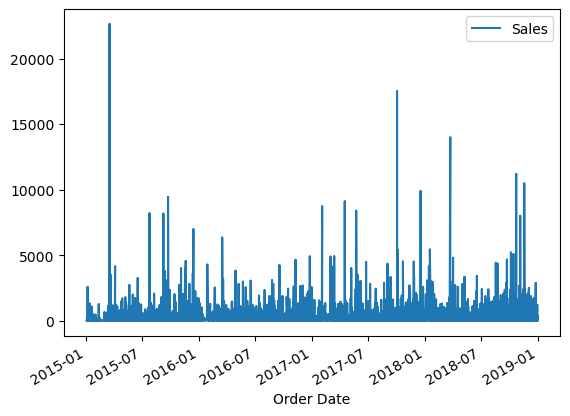

In [402]:
new_df.plot()

In [404]:
daily_sales['Order Date']=pd.to_datetime(daily_sales['Order Date'])
daily_sales.set_index('Order Date',inplace=True)

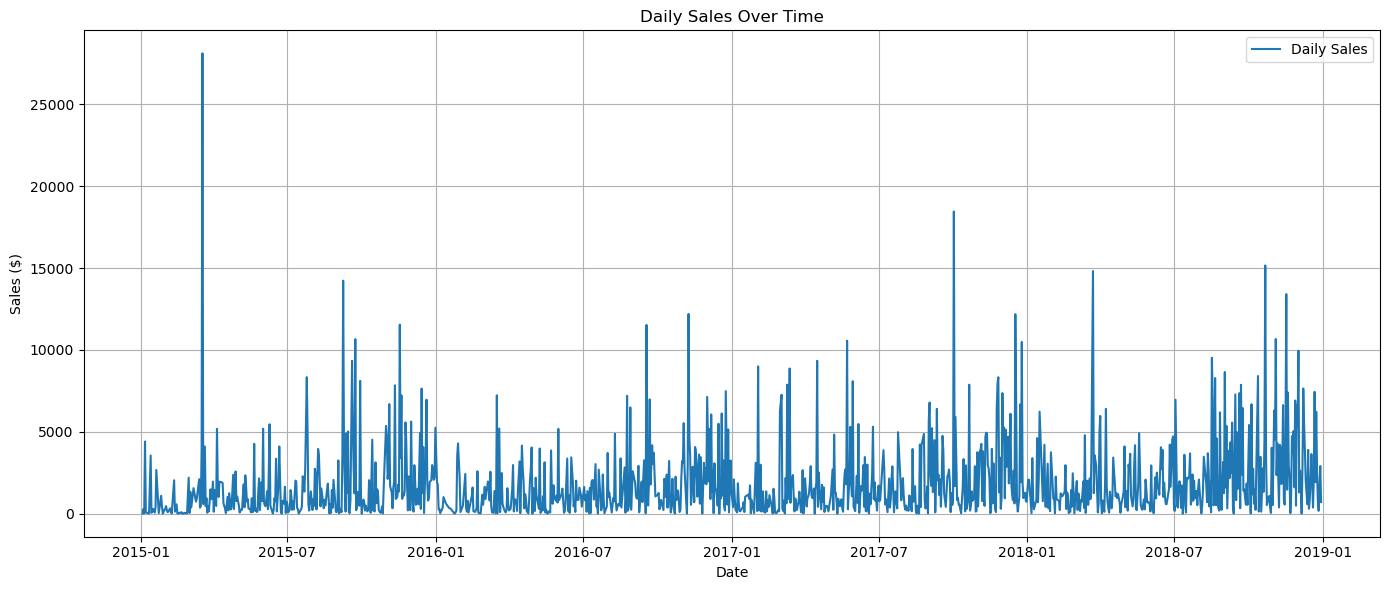

In [406]:
plt.figure (figsize=(14,6))
plt.plot(daily_sales['Sales'],label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [407]:
region_daily_sales['Order Date']=pd.to_datetime(region_daily_sales['Order Date'])
region_daily_sales.set_index('Order Date',inplace=True)

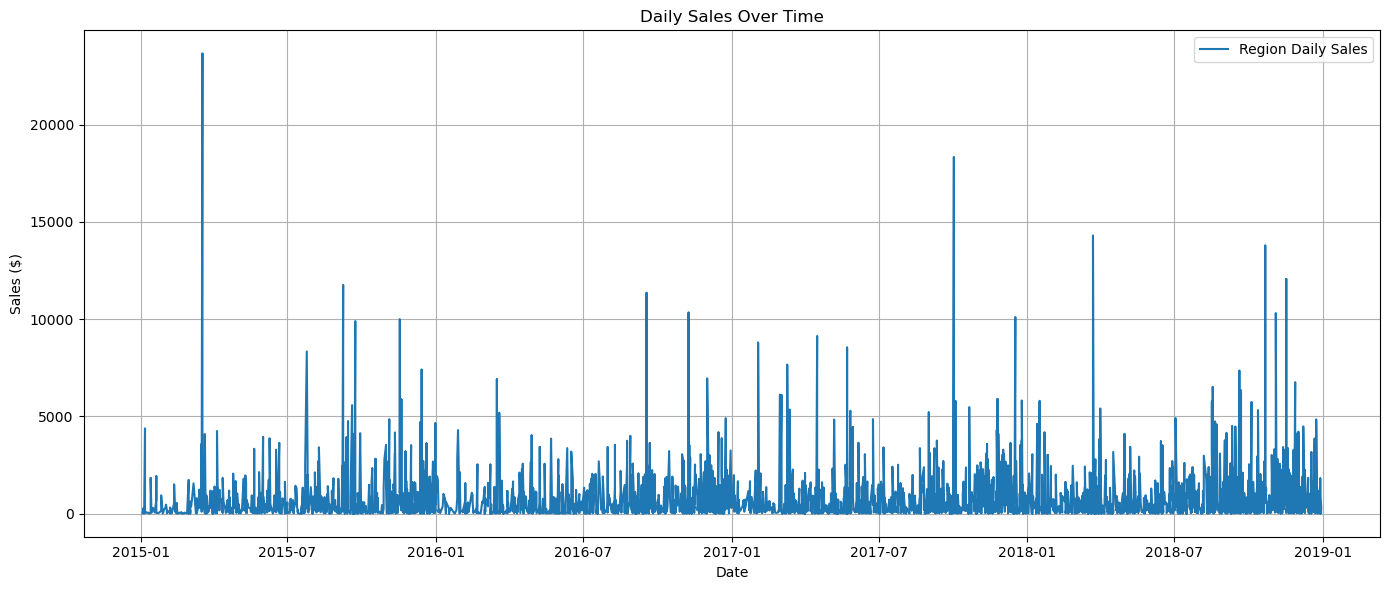

In [410]:
plt.figure (figsize=(14,6))
plt.plot(region_daily_sales['Sales'],label='Region Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

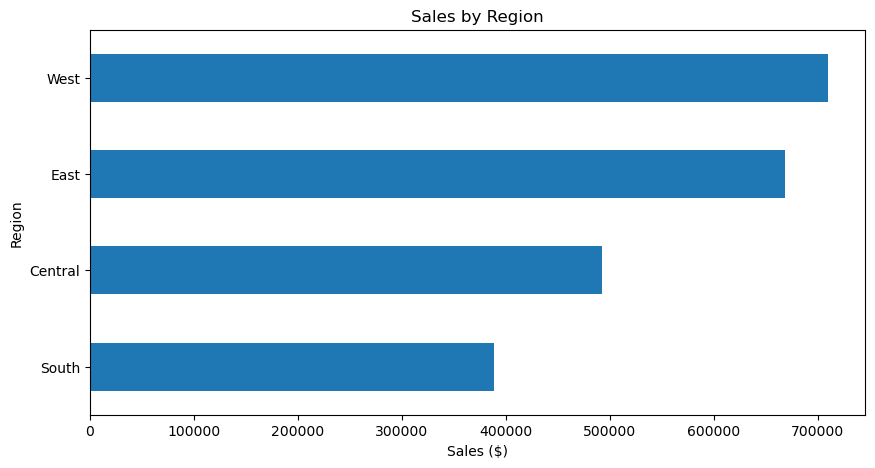

In [416]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='barh', title='Sales by Region', figsize=(10,5))
plt.xlabel('Sales ($)')
plt.show()

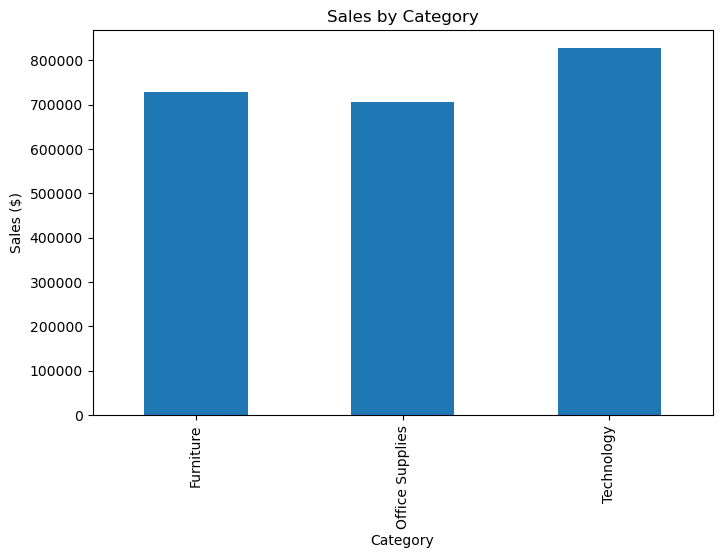

In [418]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar', title='Sales by Category', figsize=(8,5))
plt.ylabel('Sales ($)')
plt.show()

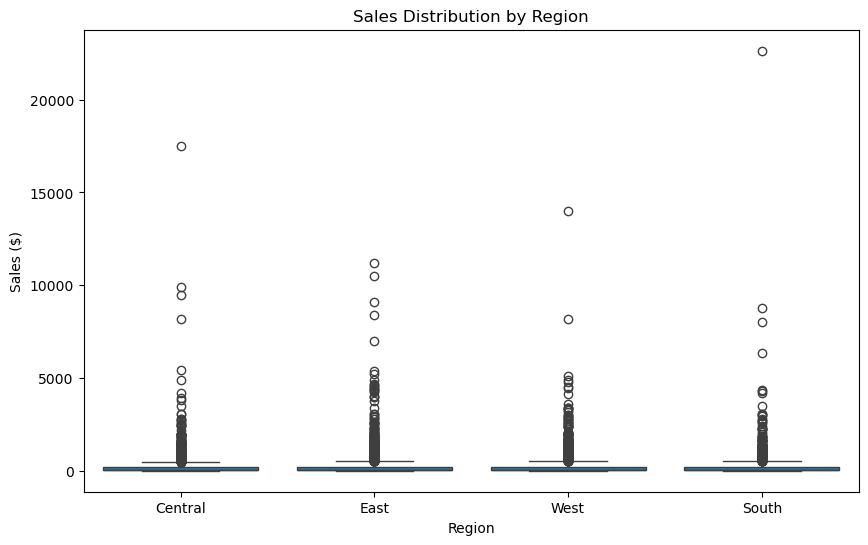

In [442]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales Distribution by Region')
plt.ylabel('Sales ($)')
plt.show()

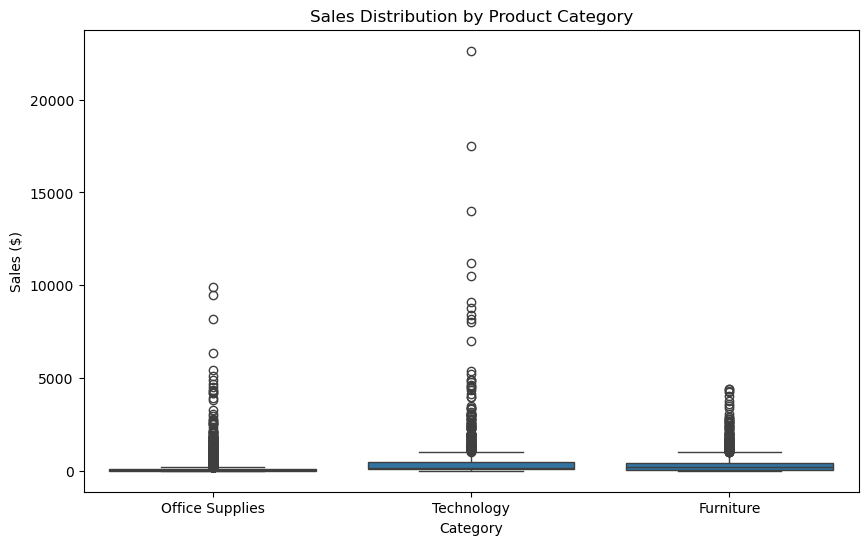

In [446]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Product Category')
plt.ylabel('Sales ($)')
plt.show()

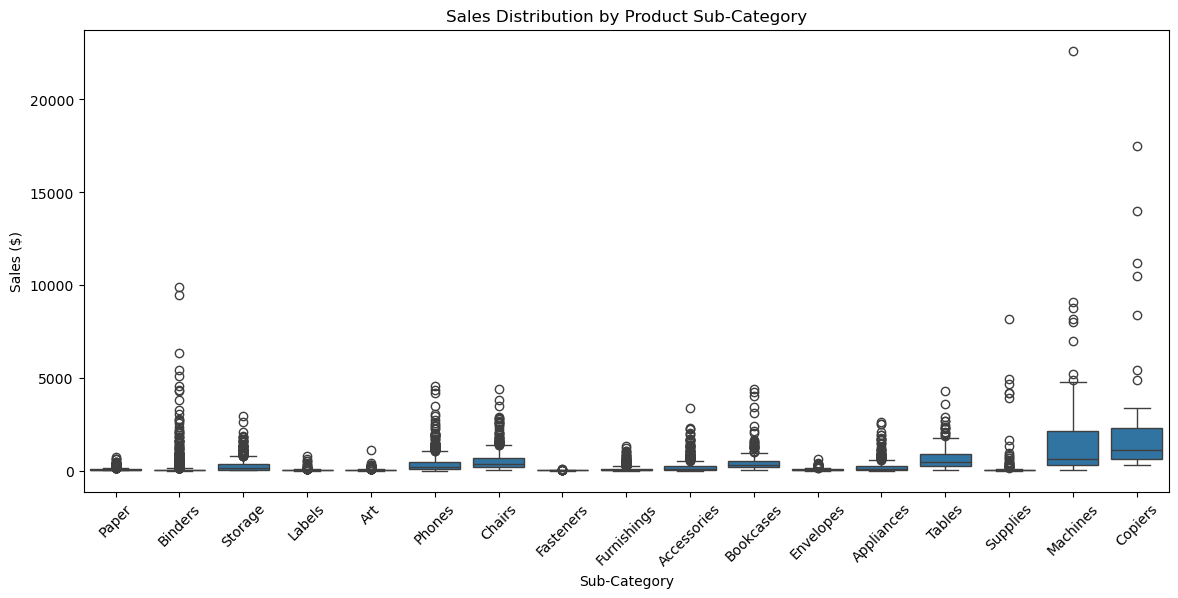

In [448]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=df)
plt.title('Sales Distribution by Product Sub-Category')
plt.xticks(rotation=45)
plt.ylabel('Sales ($)')
plt.show()

In [452]:

df['Log_Sales'] = np.log1p(df['Sales'])  # log1p handles zero safely


In [454]:

upper_limit = df['Sales'].quantile(0.95)


df['Capped_Sales'] = np.where(df['Sales'] > upper_limit, upper_limit, df['Sales'])


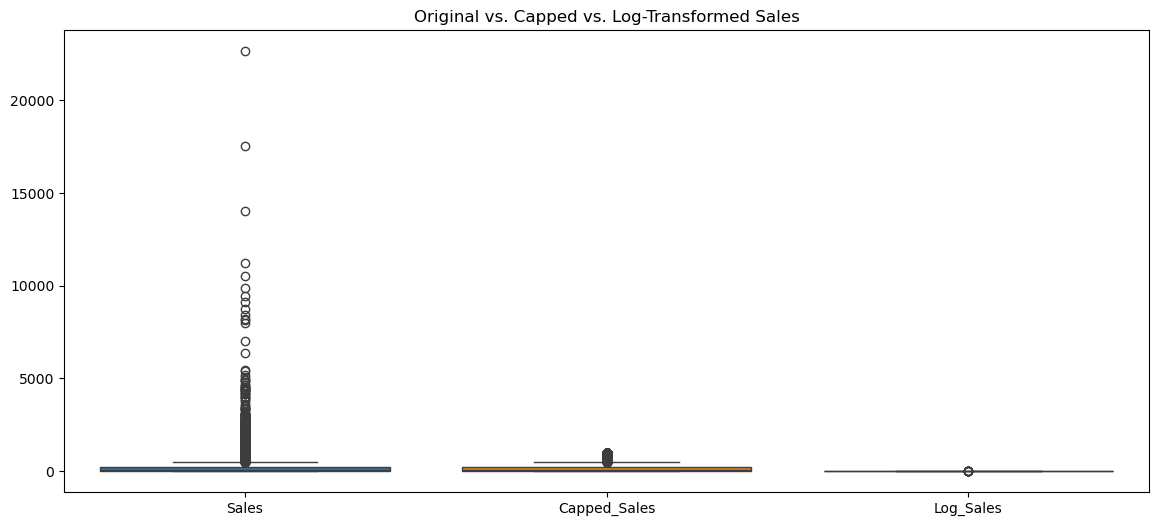

In [456]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['Sales', 'Capped_Sales', 'Log_Sales']])
plt.title("Original vs. Capped vs. Log-Transformed Sales")
plt.show()


## Step 7: Modeling – Forecasting Sales for the Next 7 Days

In [477]:
df_office = df[df['Category'] == 'Office Supplies']
df_tech = df[df['Category'] == 'Technology']
df_furniture = df[df['Category'] == 'Furniture']


In [479]:
office_sales = df_office.groupby('Order Date')['Sales'].sum().reset_index()
tech_sales = df_tech.groupby('Order Date')['Sales'].sum().reset_index()
furniture_sales = df_furniture.groupby('Order Date')['Sales'].sum().reset_index()



In [481]:
for df_sales in [office_sales, tech_sales, furniture_sales]:
    df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
    df_sales.set_index('Order Date', inplace=True)


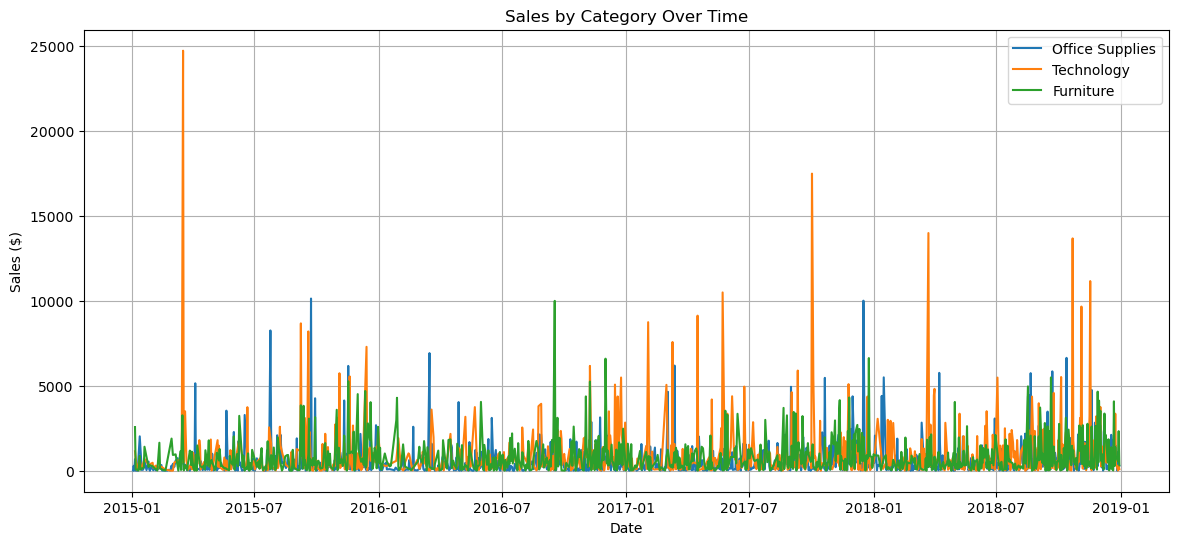

In [483]:
plt.figure(figsize=(14, 6))
plt.plot(office_sales['Sales'], label='Office Supplies')
plt.plot(tech_sales['Sales'], label='Technology')
plt.plot(furniture_sales['Sales'], label='Furniture')
plt.title('Sales by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()


## Step 8: Modeling – Forecasting Sales for the Next 7 Days

In [557]:
# Step 1: Prepare Data
df_office = df[df['Category'] == 'Office Supplies']
office_sales = df_office.groupby('Order Date')['Sales'].sum().reset_index()
office_sales['Order Date'] = pd.to_datetime(office_sales['Order Date'])
office_sales.set_index('Order Date', inplace=True)
office_sales = office_sales.asfreq('D').fillna(0)

# Step 2: Train-Test Split
train_office = office_sales[:-7]
test_office = office_sales[-7:]

# Step 3: ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_office['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Step 4: Forecast
forecast = model_fit.forecast(steps=7)
forecast.index = test_office.index  


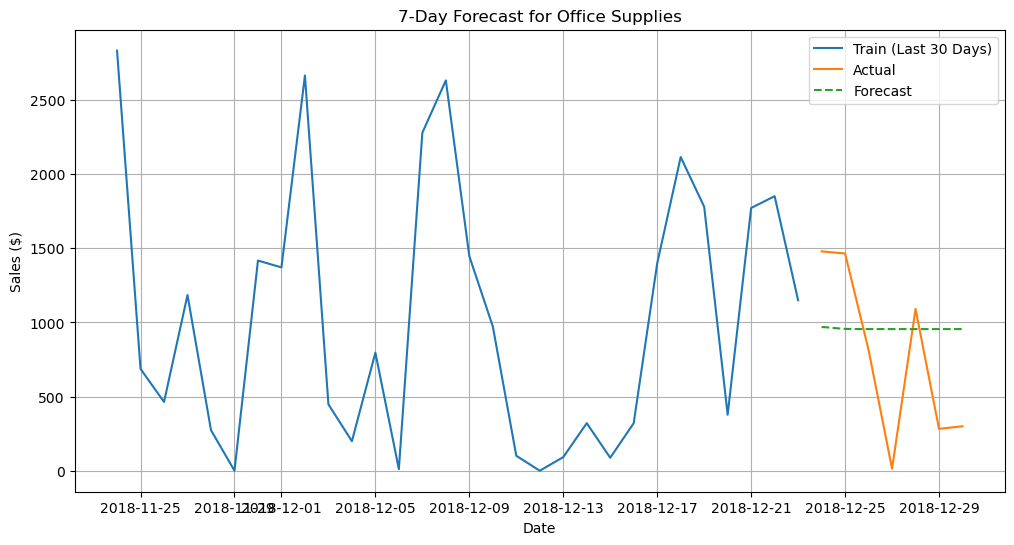

In [559]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_office['Sales'][-30:], label='Train (Last 30 Days)')
plt.plot(test_office['Sales'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('7-Day Forecast for Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()


In [561]:
office_sales['Log_Sales'] = np.log1p(office_sales['Sales'])  


In [563]:
train_log = office_sales['Log_Sales'][:-7]
test_log = office_sales['Log_Sales'][-7:]


In [565]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_log,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit(disp=False)


In [566]:
log_forecast = sarima_result.forecast(steps=7)
forecast = np.expm1(log_forecast) 
forecast.index = test_log.index  


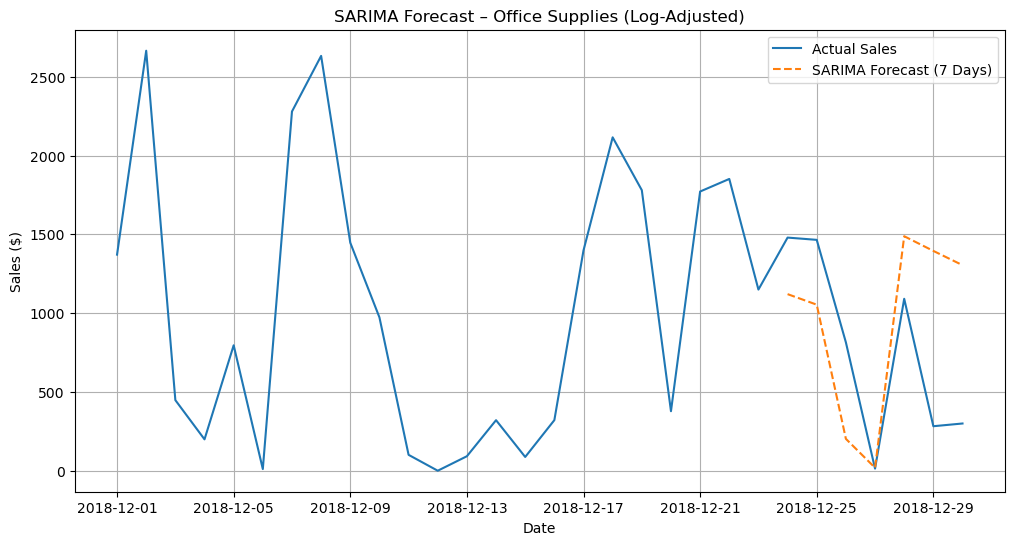

In [569]:
plt.figure(figsize=(12, 6))
plt.plot(office_sales['Sales'][-30:], label='Actual Sales')
plt.plot(forecast, label='SARIMA Forecast (7 Days)', linestyle='--')
plt.title('SARIMA Forecast – Office Supplies (Log-Adjusted)')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()


### The SARIMA model, trained on log-transformed sales and configured with weekly seasonality, produced a significantly more responsive and accurate 7-day forecast compared to basic ARIMA. It captured the directional trends of daily sales, reducing the impact of extreme outliers and better aligning with real sales fluctuations in the Office Supplies category.


In [595]:
df_furn = df[df['Category'] == 'Furniture']
furn_sales = df_furn.groupby('Order Date')['Sales'].sum().reset_index()
furn_sales['Order Date'] = pd.to_datetime(furn_sales['Order Date'])
furn_sales.set_index('Order Date', inplace=True)
furn_sales = furn_sales.asfreq('D').fillna(0)
furn_sales['Log_Sales'] = np.log1p(furn_sales['Sales'])



In [597]:
train_furn = furn_sales['Log_Sales'][:-7]
test_furn = furn_sales['Log_Sales'][-7:]


In [599]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_furn = SARIMAX(train_furn,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, 7),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

result_furn = sarima_furn.fit(disp=False)


In [601]:
log_forecast_furn = result_furn.forecast(steps=7)
forecast_furn = np.expm1(log_forecast_furn)  # reverse log
last_date_furn = train_furn.index[-1]
forecast_furn.index = pd.date_range(start=last_date_furn + pd.Timedelta(days=1), periods=7)


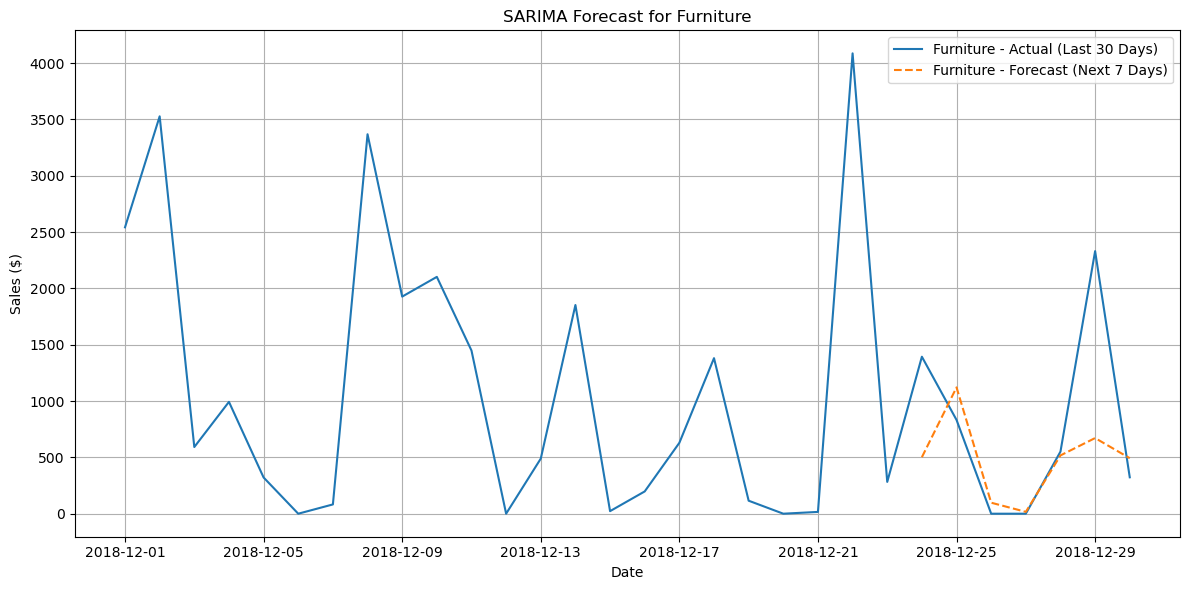

In [603]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(furn_sales['Sales'][-30:], label='Furniture - Actual (Last 30 Days)')
plt.plot(forecast_furn, label='Furniture - Forecast (Next 7 Days)', linestyle='--')
plt.title('SARIMA Forecast for Furniture')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [621]:
rmse_furn = np.sqrt(mean_squared_error(np.expm1(test_furn), forecast_furn))
print(f'RMSE for Furniture Forecast: {rmse_furn:.2f}')


RMSE for Furniture Forecast: 724.21


In [605]:
df_tech = df[df['Category'] == 'Technology']
tech_sales = df_tech.groupby('Order Date')['Sales'].sum().reset_index()
tech_sales['Order Date'] = pd.to_datetime(tech_sales['Order Date'])
tech_sales.set_index('Order Date', inplace=True)
tech_sales = tech_sales.asfreq('D').fillna(0)
tech_sales['Log_Sales'] = np.log1p(tech_sales['Sales'])


In [607]:
train_tech = tech_sales['Log_Sales'][:-7]
test_tech = tech_sales['Log_Sales'][-7:]


In [609]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_tech = SARIMAX(train_tech,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, 7),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

result_tech = sarima_tech.fit(disp=False)


In [611]:
log_forecast_tech = result_tech.forecast(steps=7)
forecast_tech = np.expm1(log_forecast_tech)
last_date_tech = train_tech.index[-1]
forecast_tech.index = pd.date_range(start=last_date_tech + pd.Timedelta(days=1), periods=7)


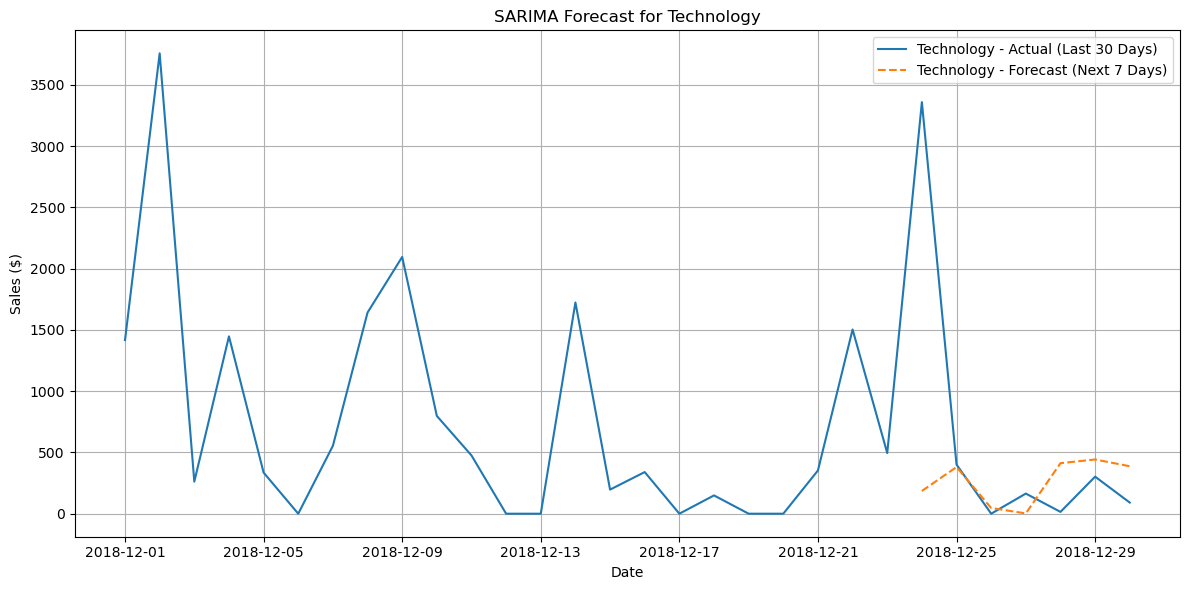

In [613]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(tech_sales['Sales'][-30:], label='Technology - Actual (Last 30 Days)')
plt.plot(forecast_tech, label='Technology - Forecast (Next 7 Days)', linestyle='--')
plt.title('SARIMA Forecast for Technology')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [617]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_tech = np.sqrt(mean_squared_error(np.expm1(test_tech), forecast))
print(f'RMSE for Technology Forecast: {rmse_tech:.2f}')


RMSE for Technology Forecast: 1215.38


## Step 9: Recommendations 

### Accurate 7-day sales forecasts can empower Superstore’s managers to make smarter, data-driven inventory decisions.
### Use daily forecasts per category to adjust stock levels proactively 
### When forecasting sales trends for 7 days in advance it allows regional teams to avoid unnecasary order-ordering, prevent stockouts during high-deman periods.
###   If implemented effectively, this approach can help reduce overstock and stockout rates by **up to 15%**, based on improved alignment between supply and predicted demand

## Step 10: Recommendations

### Forecasr by individual product or SKU level to enable more precise reorder quantities 
###  Automate model retraining and forecasting daily using a pipeline that ingests sales data, generates predictions, and updates the dashboard in real-time.